<a href="https://colab.research.google.com/github/AbigailDerton/digit_recognizer/blob/main/Digit_Recognizer_Computer_vision_fundamentals_applied_to_the_famous_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer - Computer vision fundamentals applied to the famous MNIST data

Author: Abigail Derton ([LinkedIn](https://www.linkedin.com/in/abigail-derton/), [GitHub](https://github.com/AbigailDerton))

This notebook is my submission to the [Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer) competition on Kaggle. Using computer vision and machine learning, I compare the ability of machine learning and deep learning approaches to categorize handwritten digits.

The workflow is organized as follows:

1. Import required libraries and load the data

2. Explore and visualize image data

3. Train baseline models

4. Define a data proprocessing pipeline

5. Train and tune machine learning and deep learning models to categorize images

6. Evaluate model performance on unseen test data


## 1. Import required libraries and load the data

In [60]:
import pandas as pd # For loading csv files and manipulating dataframes
import numpy as np  # For numpy arrays (needed to plot image data)
import matplotlib.pyplot as plt  # For plotting
import random # needed to randomly select from a list

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
?train_test_split

In [3]:
# Load train and test sets from csv files
train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

# Impute NaN values
train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True

In [42]:
train, val = train_test_split(train, test_size=.2, random_state=42)
X_train = train.drop('label', axis=1)
y_train = train["label"]
X_val = val.drop('label', axis=1)
y_val = val["label"]

In [4]:
# Split the training data into features and labels
X_train = train.drop('label', axis=1)
y_train = train["label"]

## 2. Explore and visualize image data

In [5]:
# View the first few rows of data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
for label in range(10):
    print(f"{label}: {np.round(train["label"].value_counts()[label] / len(train) * 100, decimals=1)} %")
train["label"].value_counts()[2]

0: 9.8 %
1: 11.2 %
2: 9.9 %
3: 10.4 %
4: 9.7 %
5: 9.0 %
6: 9.8 %
7: 10.5 %
8: 9.7 %
9: 10.0 %


np.int64(4177)

In [8]:
train.shape

(42000, 785)

Look at some of the digit instances:

In [9]:
def plot_digit_grid(X, y, nrows, ncols):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(28, 28))
    row_i = [r for r in range(nrows) for _ in range(nrows)]
    col_i = [_ for r in range(nrows) for _ in range(nrows)]
    for i in range(nrows*ncols):
        digit_to_plot = random.choice(range(len(y)))

        axes[row_i[i], col_i[i]].imshow((X.iloc[digit_to_plot]).to_numpy().reshape(28,28), cmap="binary")
        axes[row_i[i], col_i[i]].axis("off")
        axes[row_i[i], col_i[i]].text(x=3, y=20, s=str(y_train[digit_to_plot]), fontsize=44)

    fig.suptitle("Handwritten Digits", fontsize=50, weight='bold')
    plt.show()

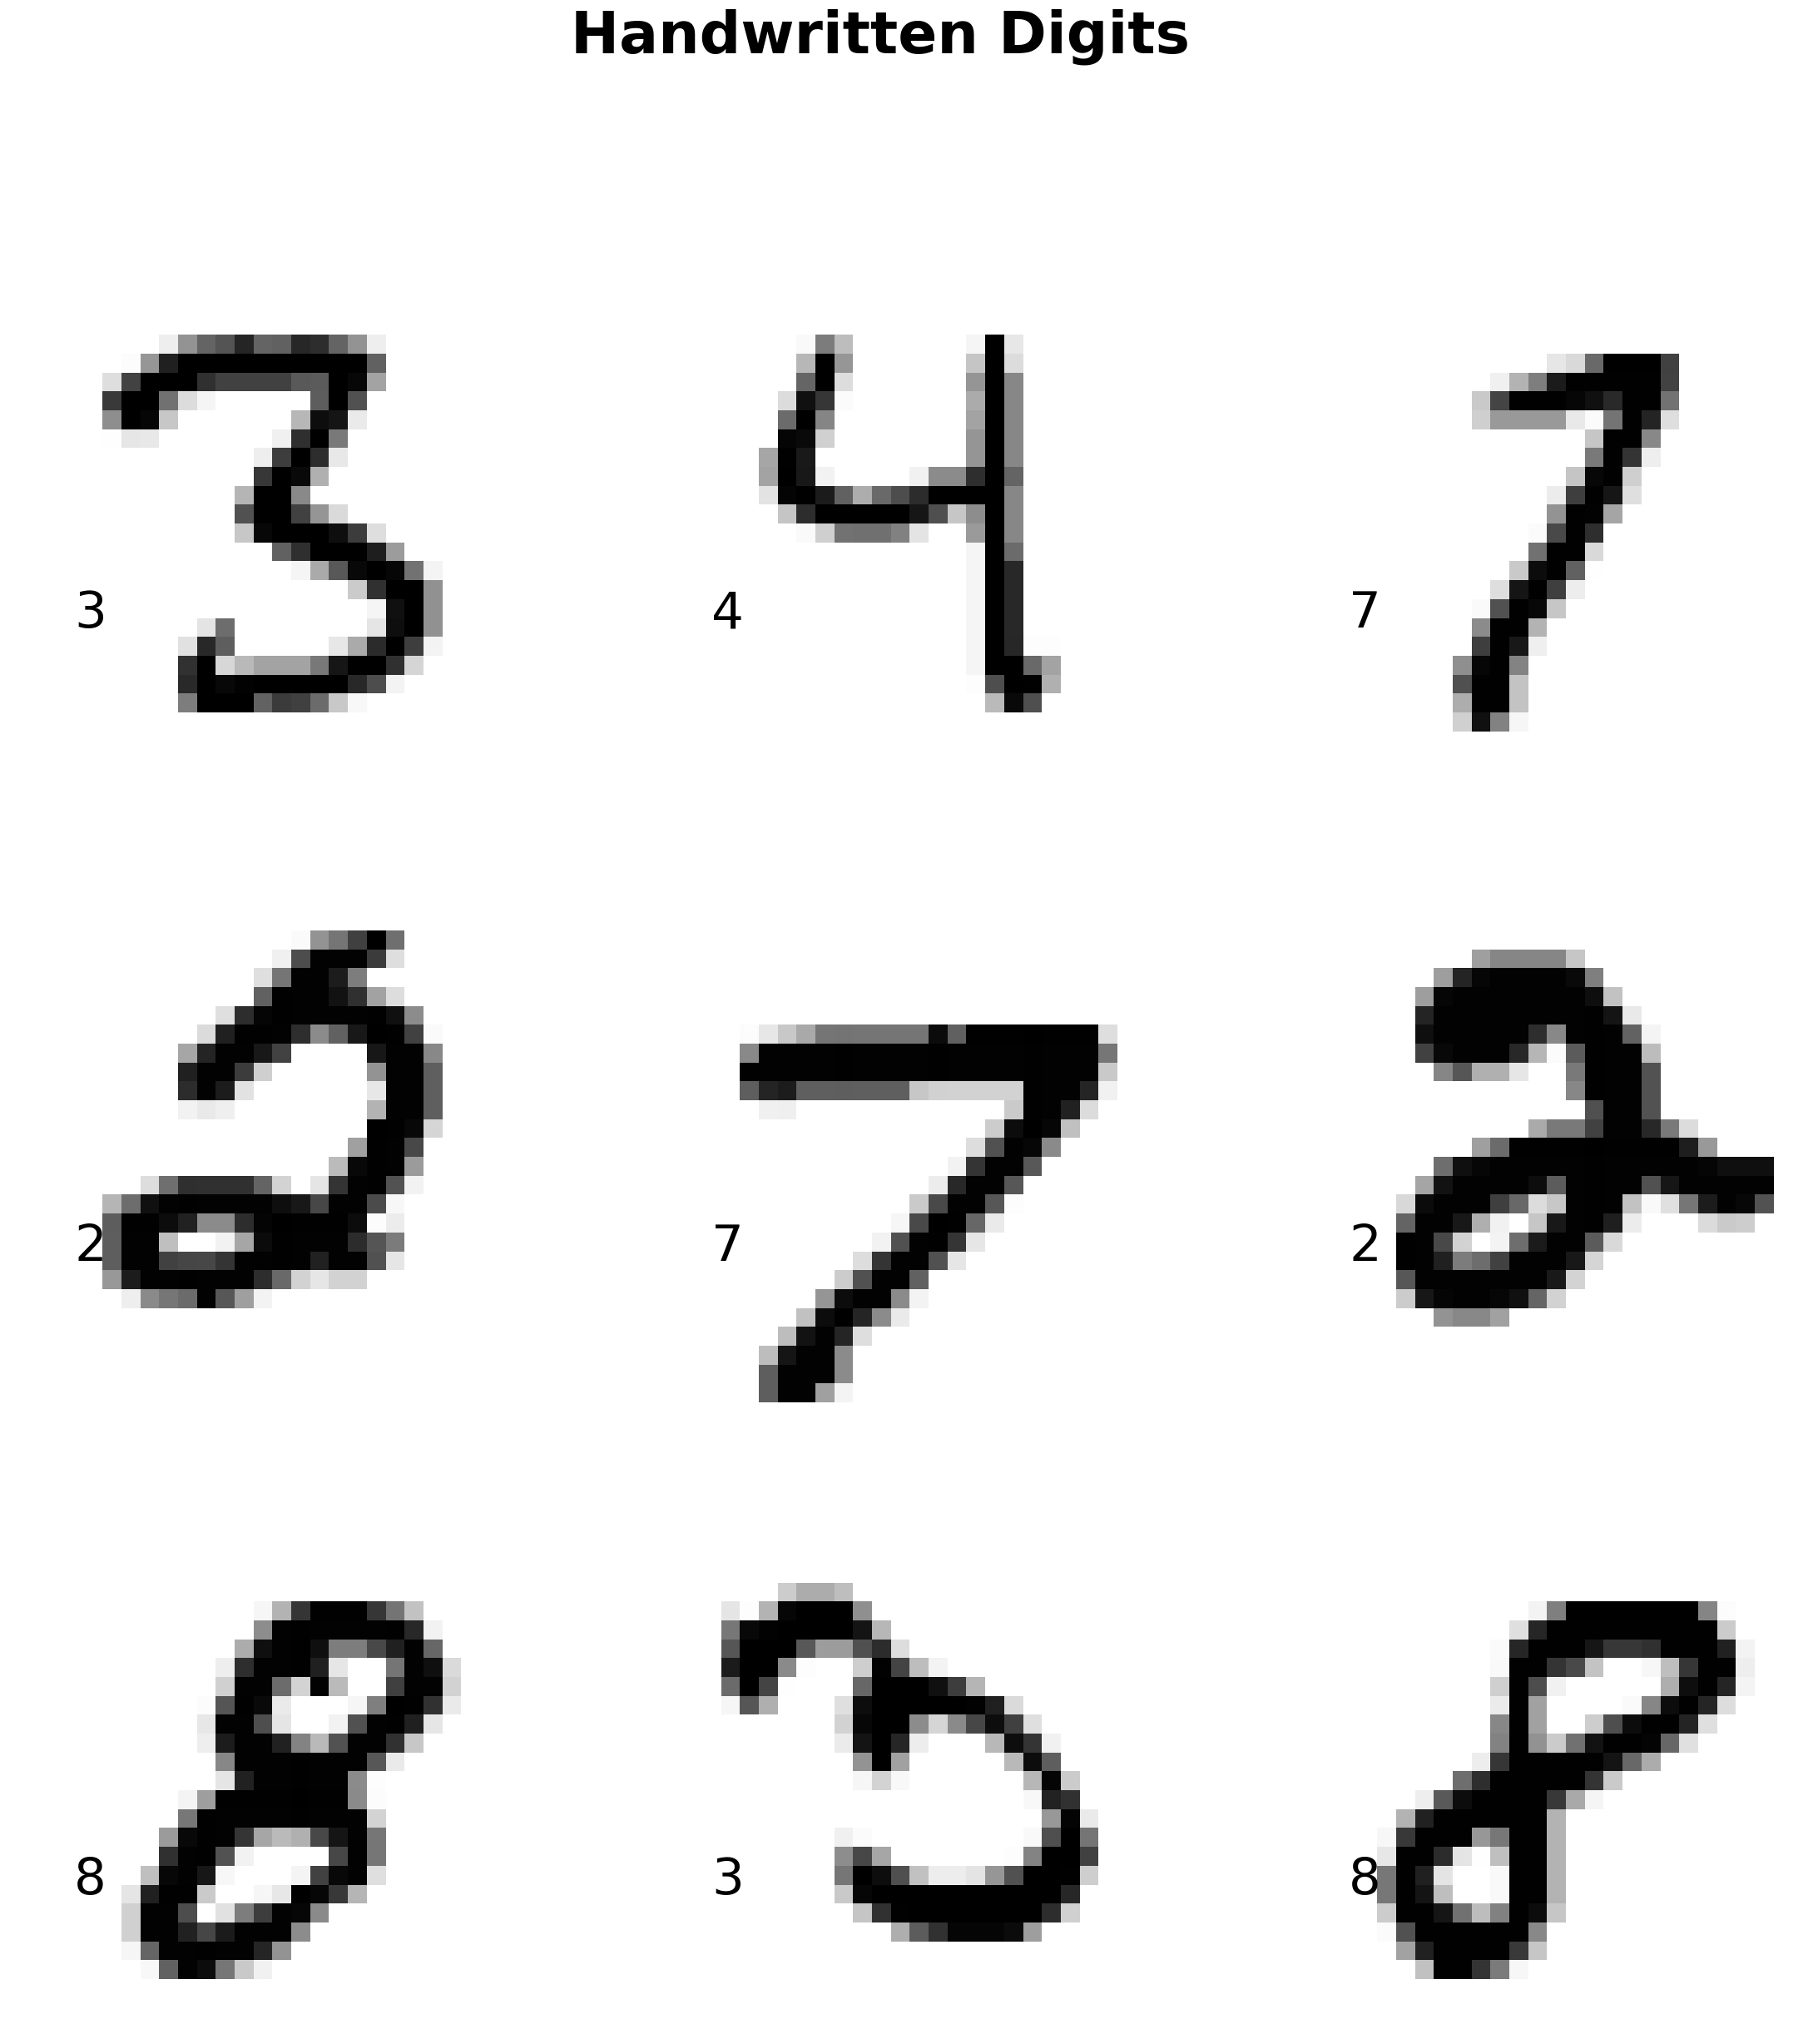

In [10]:
plot_digit_grid(X_train, y_train, 3, 3)

## Create data transformation pipeline

In [ ]:
class digit_transformer():


## 3. Train baseline models

Start by fitting classic machine learning models on the un-processed training data. This will provide metric scores which we can compare more complex models to later on.

K Nearest Neighbors Classifier

In [44]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
X_predictions_knc = knc.predict(X_val)

In [46]:
print(f'Precision score: {round(precision_score(y_val, X_predictions_knc, average="macro"),3)}')
print(f'Recall score: {round(recall_score(y_val, X_predictions_knc, average="macro"),3)}')
print(f'F1 score: {round(f1_score(y_val, X_predictions_knc, average="macro"),3)}')

Precision score: 0.964
Recall score: 0.963
F1 score: 0.963


Random Forest:

In [29]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
X_predictions_RF = RF.predict(X_val)

In [48]:
print(f'Precision score: {round(precision_score(y_val, X_predictions_RF, average="macro"),3)}')
print(f'Recall score: {round(recall_score(y_val, X_predictions_RF, average="macro"),3)}')
print(f'F1 score: {round(f1_score(y_val, X_predictions_RF, average="macro"),3)}')

Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


SGD Classifier:

In [32]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [49]:
X_predictions_SGD = sgd.predict(X_val)

In [50]:
print(f'Precision score: {round(precision_score(y_val, X_predictions_SGD, average="macro"),3)}')
print(f'Recall score: {round(recall_score(y_val, X_predictions_SGD, average="macro"),3)}')
print(f'F1 score: {round(f1_score(y_val, X_predictions_SGD, average="macro"),3)}')

Precision score: 0.904
Recall score: 0.895
F1 score: 0.896


Random forest achieved the highest precision, recall, and f1 scores (all 1). This model is prone to overfitting, so we will use cross-validation to ensure it performs well on unseen data.

In [51]:
# Use all labeled data for cross validation
X_train = train.drop('label', axis=1)
y_train = train["label"]

In [54]:
# Define parameter grid
param_grid = {'n_estimators': [25, 50, 100, 150], 'max_depth': [3, 5, 10, 15, None]}

In [56]:
grid_search = GridSearchCV(RF, param_grid, cv=2, scoring="f1")

In [58]:
test_gs = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

In [59]:
test_gs.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [ ]:
plt.matshow()

In [22]:
round(2.4442,2)

2.44

In [53]:
?RandomForestClassifier